In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Code:

## Used Functions:

In [5]:
# Detecting each ball
def create_boundary(image, mask, color=(255, 255, 255), size=5000, thickness=10):
    # Initialize x and y values
    x, y = None, None
    # Find contours and draw boundaries
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and draw boundaries
    for c in contours:
        if cv.contourArea(c) > size:
            x, y, w, h = cv.boundingRect(c)
            cv.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    
    # Return the modified image and image center
    if x is None or y is None:
        return image, None, None
    
    return image, (x + w // 2, y + h // 2), (w, h)


# Display masks and final image
def display_images(mask_blue, nimage, mask_red, i):
    _, axs = plt.subplots(1, 3, figsize=(10, 15))
    axs[0].imshow(mask_blue, cmap='gray')
    axs[0].set_title('Blue Mask')
    axs[0].axis('off')

    axs[1].imshow(nimage)
    axs[1].set_title(f'Image with Detected Balls {i}')
    axs[1].axis('off')

    axs[2].imshow(mask_red, cmap='gray')
    axs[2].set_title('Red Mask')
    axs[2].axis('off')
    plt.show()

## Applying the functions to each image:

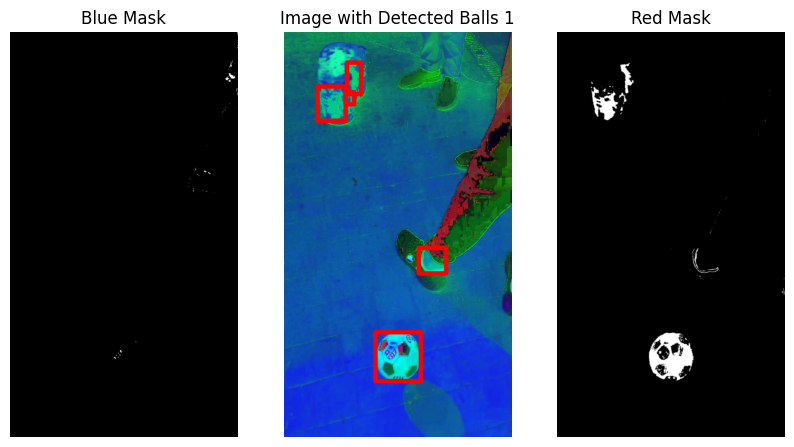

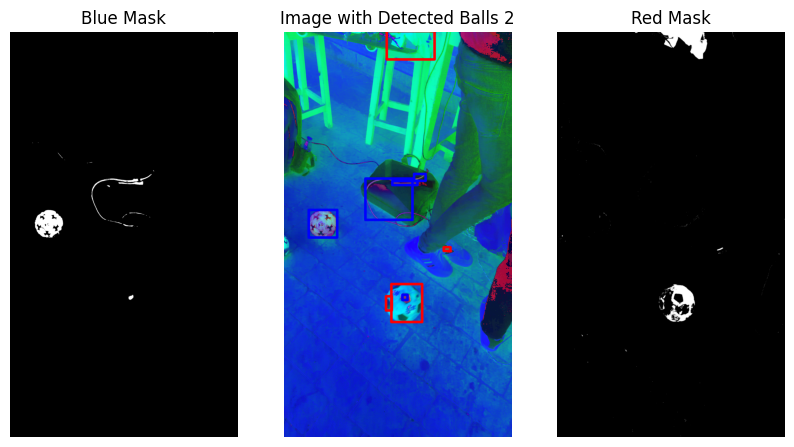

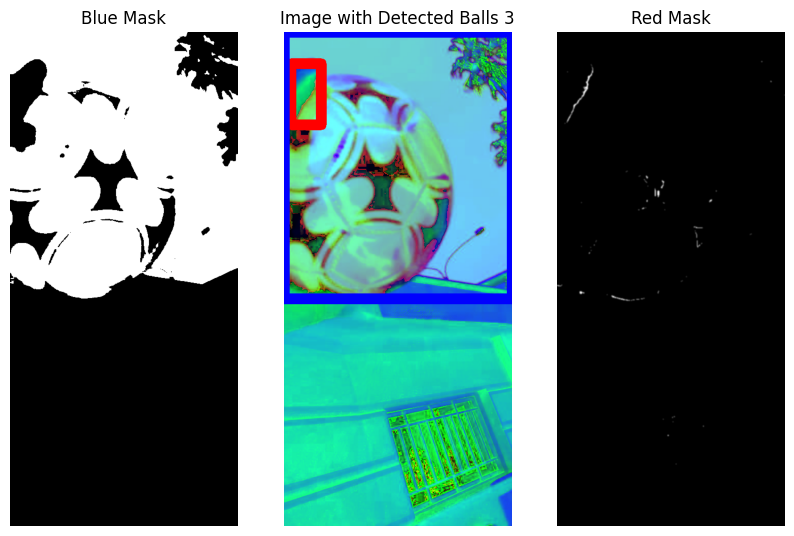

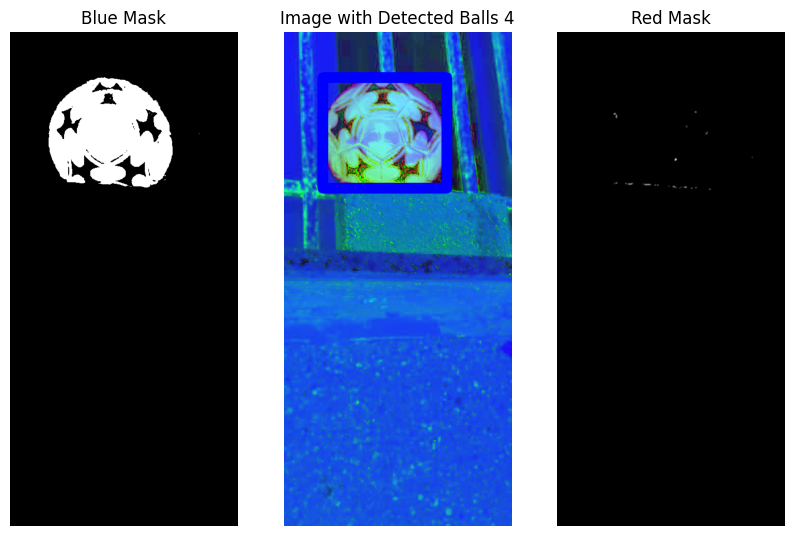

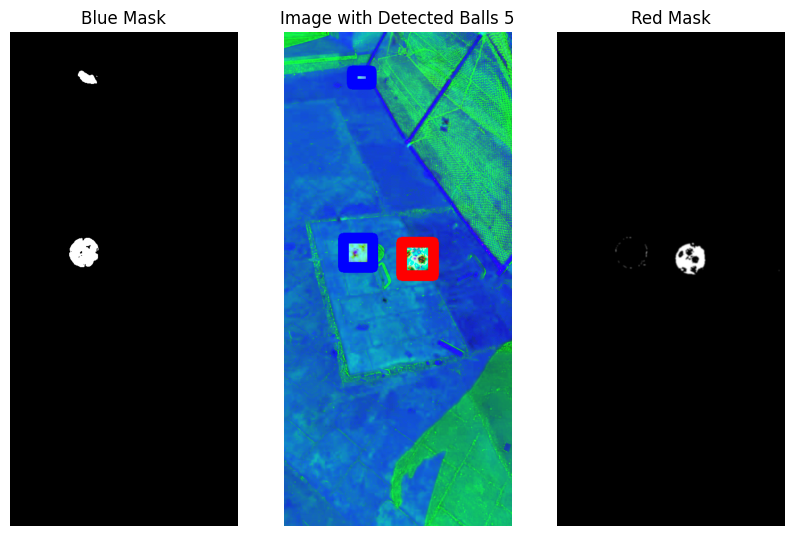

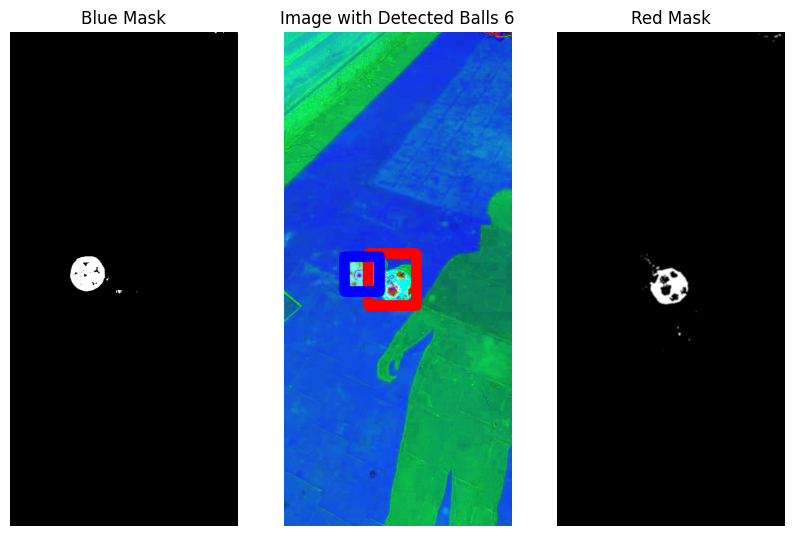

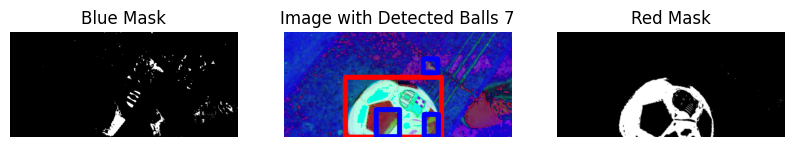

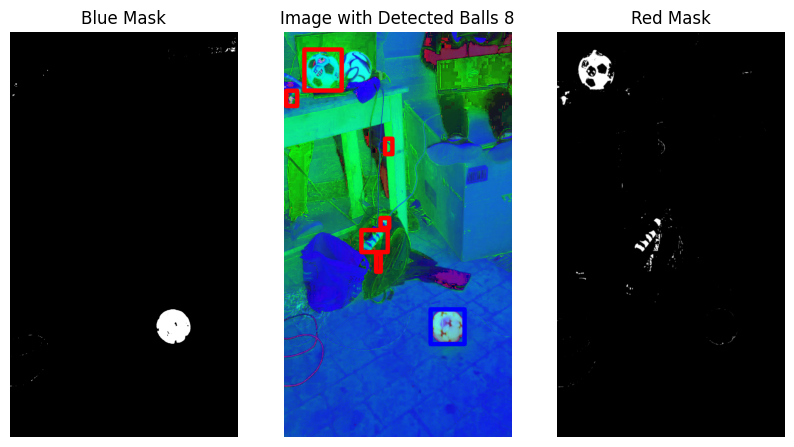

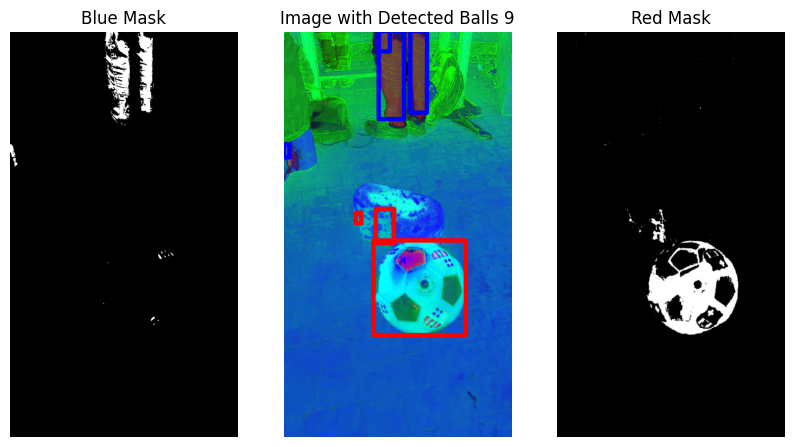

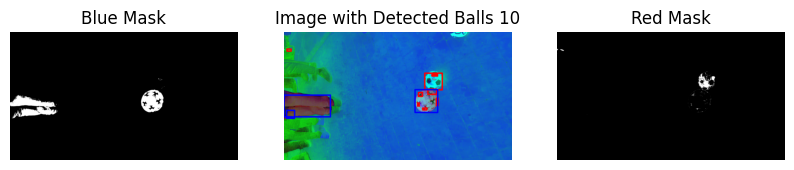

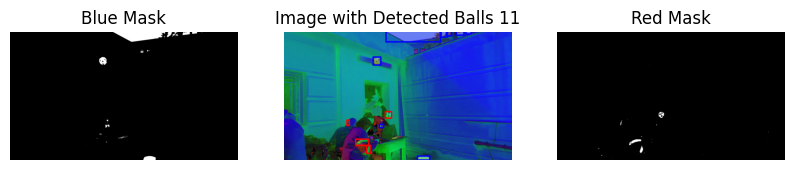

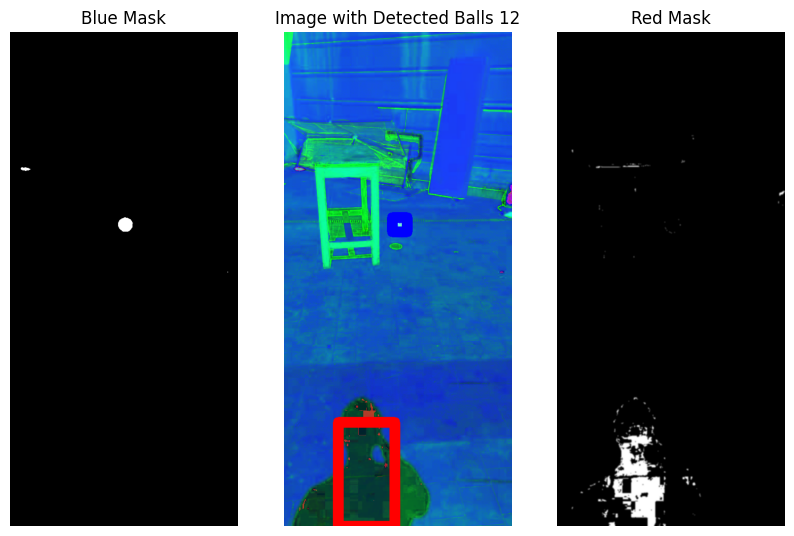

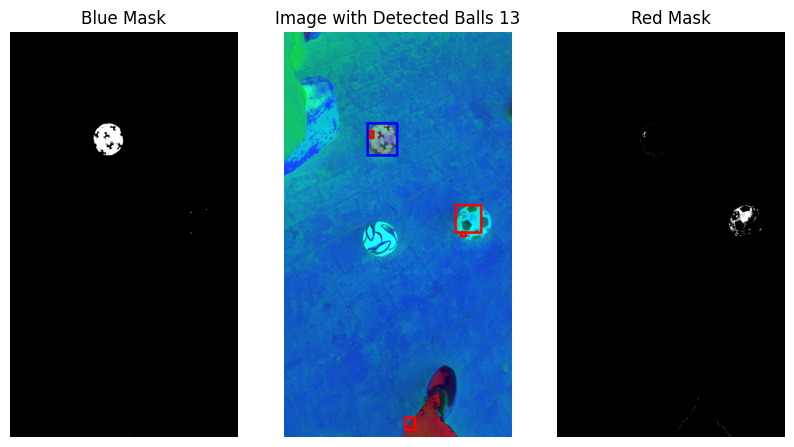

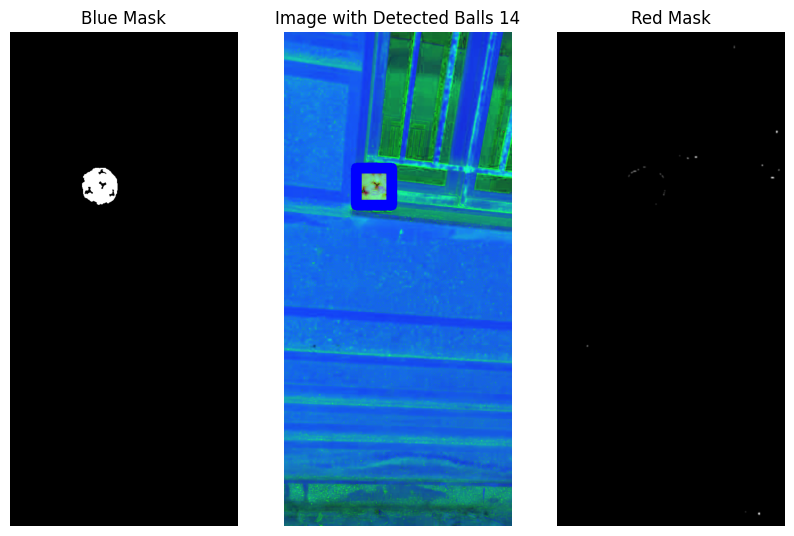

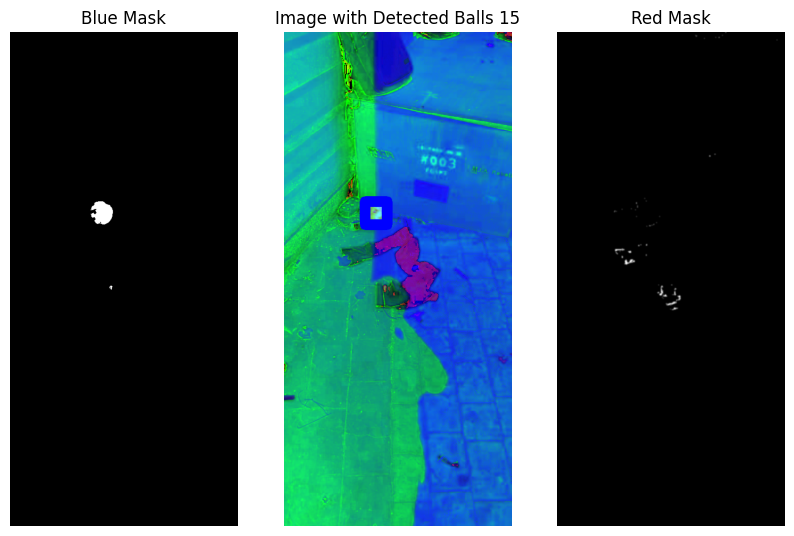

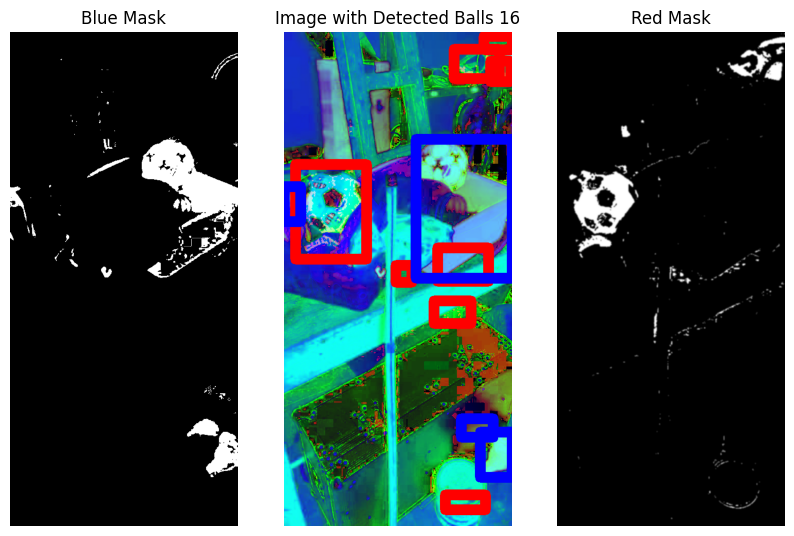

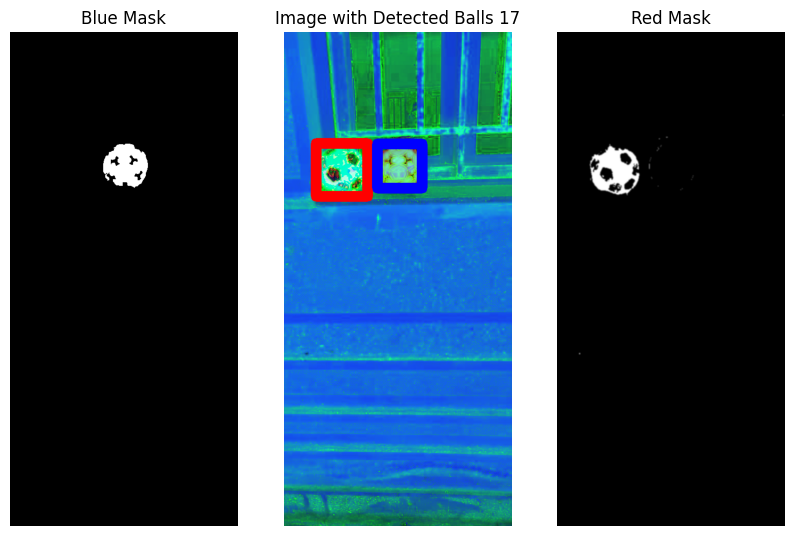

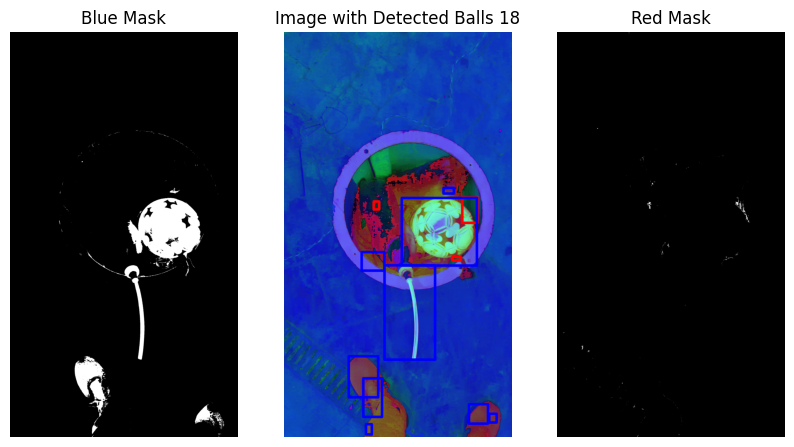

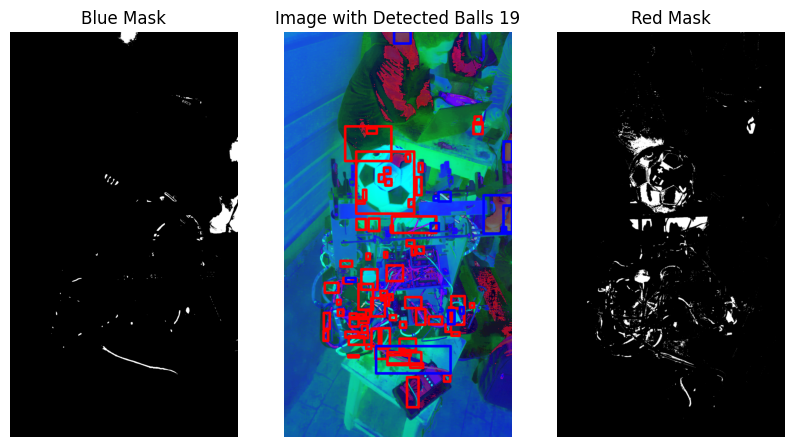

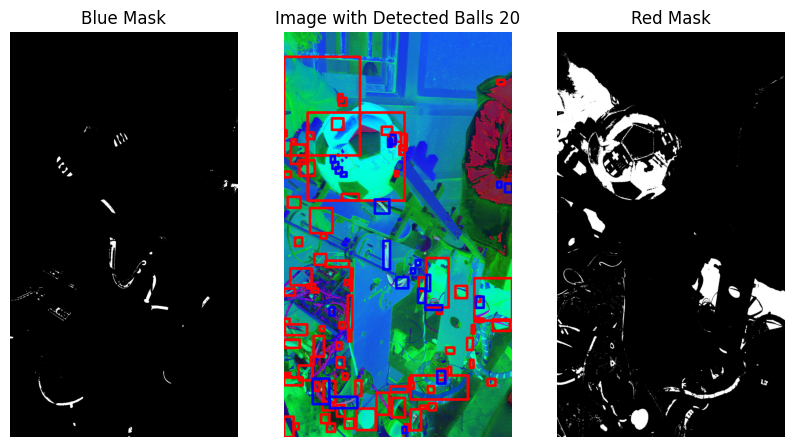

In [6]:
# Mask creation
# Blue and red color ranges in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([5, 255, 255])
lower_red2 = np.array([175, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Iterate once for each image
for i in range(1, 21):
    # Read image
    cimage = cv.imread(f'balls/ball_{i}.jpg')

    # Change its values from BGR to HSV
    cimage = cv.cvtColor(cimage, cv.COLOR_BGR2HSV)

    # Create the mask
    mask_blue = cv.inRange(cimage, lower_blue, upper_blue)
    mask_red1 = cv.inRange(cimage, lower_red1, upper_red1)
    mask_red2 = cv.inRange(cimage, lower_red2, upper_red2)
    mask_red = cv.bitwise_or(mask_red1, mask_red2)

    mask_red = cv.GaussianBlur(mask_red, (5, 5), 0)

    # Detect each red ball
    cimage, center_red, size_red = create_boundary(cimage, mask_red, color=(255, 0, 0), size=500, thickness=20)

    # Detect each blue ball
    cimage, center_blue, size_blue = create_boundary(cimage, mask_blue, color=(0, 0, 255), size=500, thickness=20)

    # Write results to file
    file = open(f'balls data/ball_{i}.txt', 'w')
    if center_red is not None:
        file.writelines(f"0 {center_red[0]} {center_red[1]} {size_red[0]} {size_red[1]}\n")
    
    if center_blue is not None:
        file.writelines(f"1 {center_blue[0]} {center_blue[1]} {size_blue[0]} {size_blue[1]}\n")

    file.close()
    
    # Display image and its masks
    display_images(mask_blue, cimage, mask_red, i)
    